In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sqlalchemy import create_engine


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

In [3]:
# 1. Determine all the variable types and then find the 
   fraction of the missing values for each variable.  

education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [4]:
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [5]:
# 2. Notice that the data has a time dimension (year). 
# For this assignment, forget about the time and treat 
# all the observations as if they're from the same year.
# Choose a strategy to deal with the missing values for 
# each variables. For which variables, filling in the 
#missing values with some value makes more sense and for
#which it doesn't.

education_A_df = education_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]



for col in fill_list:
    education_A_df.loc[:, col] = education_A_df.loc[:, col].fillna(education_A_df.loc[:, col].mean())

In [8]:
# 3. Now, take into account the time factor. Replicate your second answer but this time fill in 
# the missing values by using a statistic that is calculated within the year of the observation. 
# For example, if you want to fill a missing value for a variable with the mean of that variable, 
# calculate the mean by using only the observations for that specific year.


education_B_df = education_df.copy()

years = education_B_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        education_B_df.loc[education_B_df["YEAR"] == year, col] = education_B_df.loc[education_B_df["YEAR"] == year, col].fillna(
            education_B_df[education_B_df["YEAR"] == year][col].mean())



In [9]:
'''This time, fill in the missing values using interpolation (extrapolation).'''

education_C_df = education_df.copy()

for col in fill_list:
    education_C_df.loc[:, col] = education_C_df.loc[:, col].interpolate()

In [10]:
'''5. Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?'''

for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], education_A_df[col],
                     education_B_df[col], education_C_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

         GRADES_KG_G    GRADES_KG_G    GRADES_KG_G    GRADES_KG_G
count    1360.000000    1492.000000    1390.000000    1492.000000
mean    63746.761029   63746.761029   63810.167724   59021.465818
std     80205.138143   76572.547833   79336.993597   78271.025323
min       544.000000     544.000000     544.000000     544.000000
25%     11745.000000   14016.000000   11928.500000    9926.750000
50%     41597.500000   48897.000000   42968.000000   38507.000000
75%     73865.250000   70372.750000   72972.250000   70748.750000
max    530531.000000  530531.000000  530531.000000  530531.000000
Statistics for columns: GRADES_4_G
          GRADES_4_G     GRADES_4_G     GRADES_4_G     GRADES_4_G
count    1361.000000    1492.000000    1390.000000    1492.000000
mean    64538.927259   64538.927259   64590.152441   59797.646113
std     80293.387625   76684.998585   79451.944548   78406.899202
min       633.000000     633.000000     633.000000     633.000000
25%     13739.000000   15195.500000   141

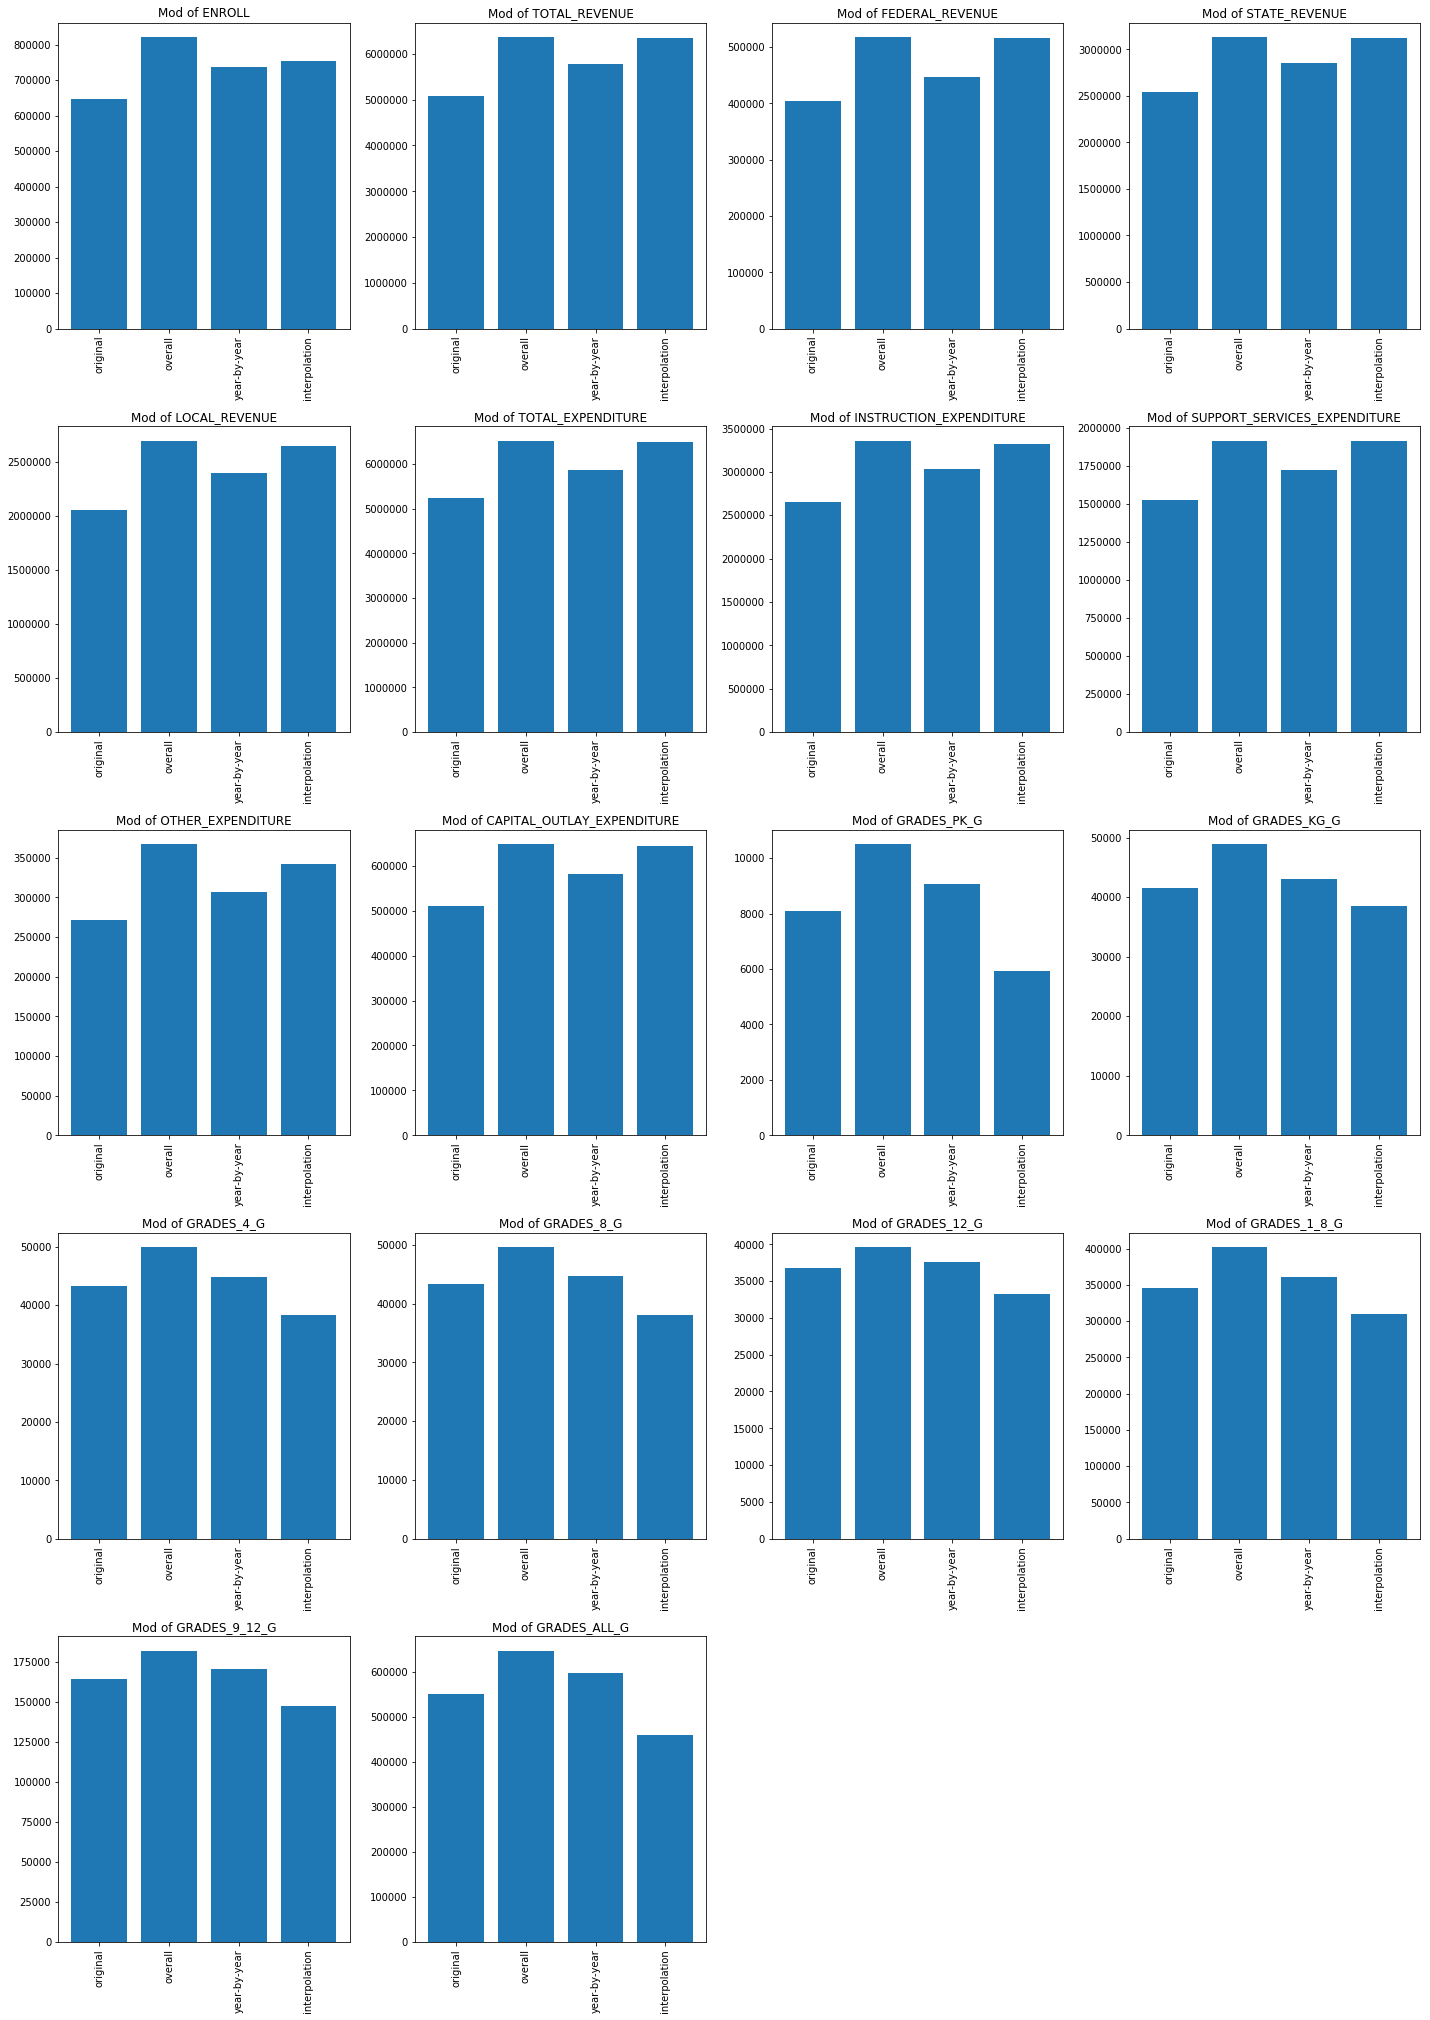

In [11]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([education_df[col], education_A_df[col],
                     education_B_df[col], education_C_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()